In [1]:
import pandas as pd
import numpy as np
import ezodf
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
tab = ezodf.opendoc(filename='data.ods').sheets[0]
df = pd.DataFrame({col[0].value:[x.value for x in col[1:]]
                         for col in tab.columns()})
df.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,y6,x7,y7,x8,y8,x9,y9,x10,y10,None
0,56.0,11.0,70.0,0.0,23.0,1.0,73.0,7.0,4.0,5.0,...,1.0,40.0,5.0,61.0,2.0,1.0,0.0,41.0,0.0,None
1,21.0,16.0,88.0,0.0,24.0,2.0,78.0,7.0,86.0,5.0,...,6.0,60.0,10.0,87.0,13.0,2.0,0.0,42.0,0.0,None
2,22.0,16.0,37.0,2.0,33.0,20.0,13.0,9.0,1.0,6.0,...,6.0,3.0,13.0,99.0,16.0,3.0,0.0,43.0,0.0,None
3,23.0,16.0,94.0,2.0,85.0,24.0,18.0,12.0,39.0,7.0,...,6.0,17.0,18.0,32.0,19.0,4.0,0.0,44.0,0.0,None
4,24.0,16.0,51.0,3.0,53.0,28.0,59.0,14.0,32.0,8.0,...,6.0,92.0,18.0,17.0,20.0,5.0,0.0,45.0,0.0,None


In [3]:
points = df[['x3', 'y3']]

points = points.dropna()
points = points.values

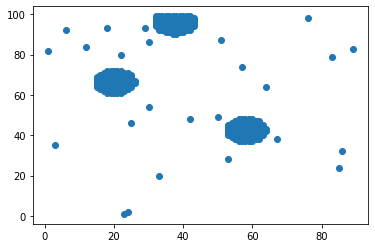

In [4]:
plt.scatter(points[:, 0],  points[:,1]);

In [5]:
squeared_dist= lambda point1, point2: np.sum((point1 - point2)**2, axis=1)
mean_central = lambda points: np.mean(points, axis=0)

manhetan_dist = lambda  point1, point2: np.sum(abs(point1 - point2), axis=1)
median_central = lambda points: np.median(points, axis=0)

def make_clusters(points, centers, method="mean"):
    res = []
    for elem in points:
        if method == "mean":
            dist = squeared_dist(centers, elem)
        else:
            dist = manhetan_dist(centers, elem)
        res.append(dist.argmin())

    return np.array(res)

def calc_centers(X, clusters, n_clusters, method="mean"):
    res = []
    for i in range(n_clusters):
        if method=="mean":
            res.append(mean_central(X[clusters==i]))
        else:
            res.append(median_central(X[clusters==i]))

    return np.array(res)

def train(X, n_clusters, method = "mean"):
    res = np.random.sample((n_clusters, X.shape[1])) * X.max()

    while True:
        clusters = make_clusters(X, res)
        new_centers = calc_centers(X, clusters, n_clusters, method=method)
        
        if abs(res - new_centers).max() < 1e-6:
            break
        
        res = new_centers
    return res

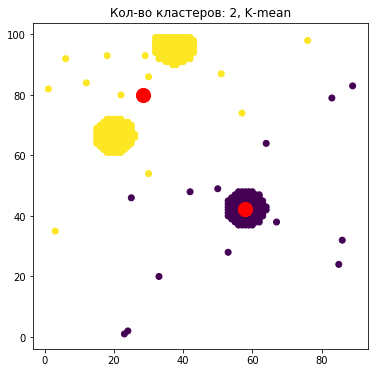

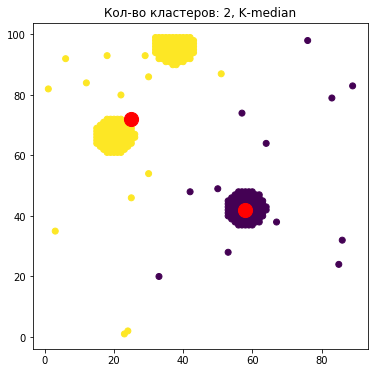

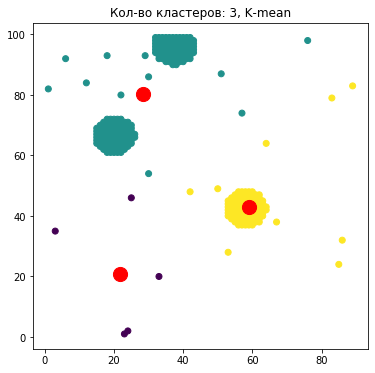

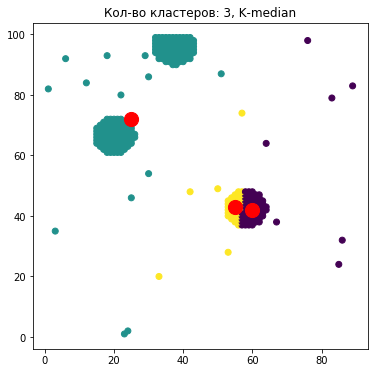

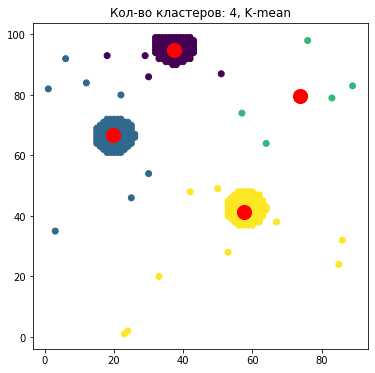

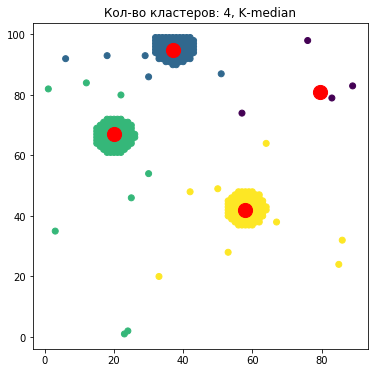

In [6]:
for n_clusters in [2, 3, 4]:
    for method in ["mean", "median"]:
        centers = train(points, n_clusters=n_clusters, method=method)
        
        
        label = make_clusters(points, centers, method)
        
        plt.figure(figsize=(6, 6))
        plt.title(f"Кол-во кластеров: {n_clusters}, K-{method}")
        plt.scatter(points[:, 0], points[:, 1], c = label)
        plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200)

### Пояснение к графику
*  цвета "маленьких" точек - принаджленость определенному кластеру
*  красные точки - центры кластеров